In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
weather_data = "C:/Users/muhli/Downloads/lessons/nu-chi-data-pt-02-2020-u-c/Homework06-Python-APIs/Instructions/output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
city_name=[]
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval \n---------------------")
for city in cities:
    response = requests.get(query_url+city).json()
    if i+1==50:
        i=1
    else:
        i=i+1
    try:
        city_name.append(response["name"])
        city_name.append(city)
        print(f"Processing Record {i} of Set 1 |{city}")
    except:
        print(f"City not found")
    pass
print('---------------------\nData Retrieval complete')

Beginning Data Retrieval 
---------------------
Processing Record 1 of Set 1 |mataura
Processing Record 2 of Set 1 |busselton
Processing Record 3 of Set 1 |taonan
Processing Record 4 of Set 1 |usevya
Processing Record 5 of Set 1 |bac lieu
City not found
Processing Record 7 of Set 1 |mahebourg
Processing Record 8 of Set 1 |suntar
Processing Record 9 of Set 1 |jibuti
Processing Record 10 of Set 1 |puerto ayora
Processing Record 11 of Set 1 |qaanaaq
Processing Record 12 of Set 1 |athabasca
Processing Record 13 of Set 1 |albany
Processing Record 14 of Set 1 |norman wells
Processing Record 15 of Set 1 |mahon
Processing Record 16 of Set 1 |port lincoln
Processing Record 17 of Set 1 |rikitea
Processing Record 18 of Set 1 |pevek
Processing Record 19 of Set 1 |port elizabeth
Processing Record 20 of Set 1 |jamestown
Processing Record 21 of Set 1 |bethel
Processing Record 22 of Set 1 |tuktoyaktuk
Processing Record 23 of Set 1 |wageningen
Processing Record 24 of Set 1 |hilo
Processing Record 25 of

Processing Record 20 of Set 1 |cabo san lucas
Processing Record 21 of Set 1 |kochkurovo
Processing Record 22 of Set 1 |chicama
Processing Record 23 of Set 1 |nikolskoye
Processing Record 24 of Set 1 |morbach
Processing Record 25 of Set 1 |guerrero negro
Processing Record 26 of Set 1 |margate
Processing Record 27 of Set 1 |ormara
Processing Record 28 of Set 1 |port blair
Processing Record 29 of Set 1 |kosai
Processing Record 30 of Set 1 |polovinnoye
Processing Record 31 of Set 1 |haapiti
Processing Record 32 of Set 1 |hornepayne
Processing Record 33 of Set 1 |port augusta
City not found
Processing Record 35 of Set 1 |mizdah
Processing Record 36 of Set 1 |menongue
Processing Record 37 of Set 1 |san ramon
Processing Record 38 of Set 1 |kerema
Processing Record 39 of Set 1 |torbay
Processing Record 40 of Set 1 |ilulissat
Processing Record 41 of Set 1 |nishihara
Processing Record 42 of Set 1 |berlevag
City not found
Processing Record 44 of Set 1 |kangaatsiaq
Processing Record 45 of Set 1 |s

Processing Record 41 of Set 1 |farah
Processing Record 42 of Set 1 |kerman
City not found
Processing Record 44 of Set 1 |nanzhang
Processing Record 45 of Set 1 |talnakh
City not found
Processing Record 47 of Set 1 |grants pass
Processing Record 48 of Set 1 |plouzane
Processing Record 49 of Set 1 |chabahar
Processing Record 1 of Set 1 |kirakira
Processing Record 2 of Set 1 |saldanha
Processing Record 3 of Set 1 |sao borja
Processing Record 4 of Set 1 |ostrovnoy
City not found
Processing Record 6 of Set 1 |tura
Processing Record 7 of Set 1 |semporna
Processing Record 8 of Set 1 |christchurch
Processing Record 9 of Set 1 |nouna
Processing Record 10 of Set 1 |weligama
Processing Record 11 of Set 1 |pokhara
Processing Record 12 of Set 1 |vostok
Processing Record 13 of Set 1 |killybegs
Processing Record 14 of Set 1 |kavaratti
Processing Record 15 of Set 1 |jinchang
Processing Record 16 of Set 1 |tateyama
Processing Record 17 of Set 1 |cayenne
Processing Record 18 of Set 1 |matara
Processing 

In [23]:
city_name

['Mataura',
 'mataura',
 'Busselton',
 'busselton',
 'Guangming',
 'taonan',
 'Usevya',
 'usevya',
 'Bac Lieu',
 'bac lieu',
 'Mahébourg',
 'mahebourg',
 'Suntar',
 'suntar',
 'Djibouti',
 'jibuti',
 'Puerto Ayora',
 'puerto ayora',
 'Qaanaaq',
 'qaanaaq',
 'Athabasca',
 'athabasca',
 'Albany',
 'albany',
 'Norman Wells',
 'norman wells',
 'Mahon',
 'mahon',
 'Port Lincoln',
 'port lincoln',
 'Rikitea',
 'rikitea',
 'Pevek',
 'pevek',
 'Port Elizabeth',
 'port elizabeth',
 'Jamestown',
 'jamestown',
 'Bethel',
 'bethel',
 'Tuktoyaktuk',
 'tuktoyaktuk',
 'Gemeente Wageningen',
 'wageningen',
 'Hilo',
 'hilo',
 'Ploufragan',
 'ploufragan',
 'Thompson',
 'thompson',
 'Avarua',
 'avarua',
 'Jämsä',
 'jamsa',
 'Chui',
 'chuy',
 'Guilin',
 'guilin',
 'Natal',
 'natal',
 'New Norfolk',
 'new norfolk',
 'Anloga',
 'anloga',
 'Nanzhou',
 'nanzhou',
 'College',
 'college',
 'Kampene',
 'kampene',
 'La Carolina',
 'la carolina',
 'Lebu',
 'lebu',
 'Batemans Bay',
 'batemans bay',
 'Luau',
 'luau'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
temp=[]
wind=[]
city_names=[]
for city in city_name:
    try:
        response_json = requests.get(query_url+city).json()
        cloud.append(response_json['weather'][0]['main'])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        wind.append(response_json["wind"]["speed"])
        city_names.append(response_json["name"])
    except:
        print("No City Found")

No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found


In [26]:
cityWeatherpy_df = pd.DataFrame({
    "City":city_names,
    "Country":country,
    "Lat":lat,
    "Long":lng,
    "Max Temp": temp,
    "Humidity":humidity,
    "Wind Speed":wind,
    "Cloud Cover":cloud})


In [30]:
cityWeatherpy_df.to_csv("weather_data",encoding='utf-8')
cityWeatherpy_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (08/22/18)')

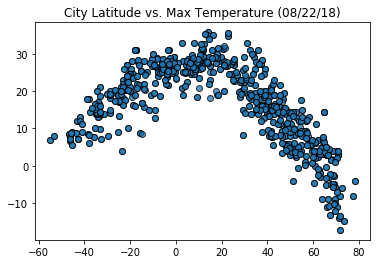

In [28]:
# Scatter plot
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (08/22/18)")


#### Latitude vs. Humidity Plot

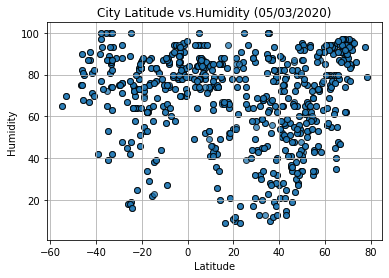

In [31]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs.Humidity (05/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(1,105)
plt.grid(True)

plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

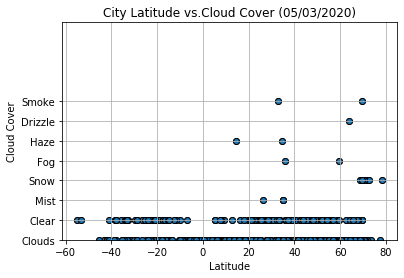

In [32]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Cloud Cover"], marker="o", alpha=0.90, edgecolor="black")
plt.title("City Latitude vs.Cloud Cover (05/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.ylim(1,12)
plt.grid(True)

plt.savefig("LatVsCloud Cover.png")


#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs.Wind Speed (05/03/2020)')

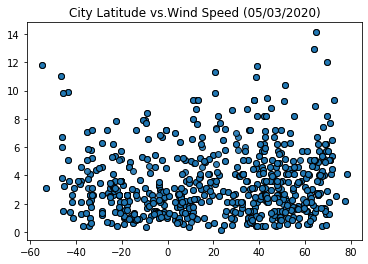

In [33]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Wind Speed"], marker="o", alpha=0.90, edgecolor="black")
plt.title("City Latitude vs.Wind Speed (05/03/2020)")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
northern_df =cityWeather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df =cityWeatherpy_df .loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

In [35]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression